# Gradient Descent Introduction:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

%matplotlib inline

In [3]:
N = 100
x = np.random.rand(N,1)*5
# Let the following command be the true function
y = 9.81 * x
# Get some noisy observations
noise = 2*np.random.randn(N,1)
y_obs = y + noise

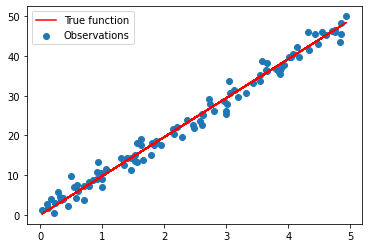

In [4]:
plt.scatter(x, y_obs, label='Observations')
plt.plot(x, y, c='r', label='True function')
plt.legend()
plt.show()

In [ ]:
10.1, 20.2 -> 10, 20

## Gradient Descent

We are trying to minimise $\sum \xi_i^2$.

\begin{align}
\mathcal{L} & = \frac{1}{N}\sum_{i=1}^N (y_i-f(x_i,w))^2 \\
& = \frac{1}{N}\sum_{i=1}^N (y_i- w x_i)^2 \\
\frac{\delta\mathcal{L}}{\delta w} & = \frac{1}{N}\sum_{i=1}^N 2(y_i-w x_i)(-x_i) \\ 
& = -\frac{1}{N}\sum_{i=1}^N 2\xi_i x_i
\end{align}
where $\xi_i$ is the error term $y_i-f(x_i,w,b)$.

Finally the weights can be updated as $w_{new} = w_{current} - \gamma \frac{\delta\mathcal{L}}{\delta w}$ where $\gamma$ is a learning rate between 0 and 1.

In [5]:
# Helper functions
def f(w):
    return w*x

def loss_function(e):
    L = np.sum(np.square(e))/N
    return L

def dL_dw(e,w):
    return -2*np.mean(e * x)

In [6]:
# The Actual Gradient Descent
def gradient_descent(iter=100,gamma=0.1):
    # get starting conditions
    w = 10*np.random.randn()
    
    params = []
    loss = np.zeros((iter,1))
    for i in range(iter):
        params.append(w)
        e = y_obs - f(w) # Really important that you use y_obs and not y (you do not have access to true y)
        loss[i] = loss_function(e)

        #update parameters
        w_new = w - gamma*dL_dw(e,w)
        w = w_new
        
    return params, loss
        
params, loss = gradient_descent()

In [7]:
iter=100
gamma = 0.1
w = 10*np.random.randn()

params = []
loss = np.zeros((iter,1))
for i in range(iter):
#         from IPython.core.debugger import Tracer; Tracer()()
    params.append(w)
    e = y_obs - f(w) # Really important that you use y_obs and not y (you do not have access to true y)
    loss[i] = loss_function(e)

    #update parameters
    w_new = w - gamma*dL_dw(e,w)
    w = w_new

In [8]:
dL_dw(e,w)

-1.0766942892814769e-14

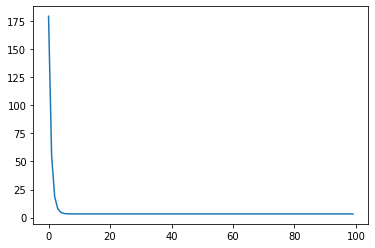

In [9]:
plt.plot(loss)
plt.show()

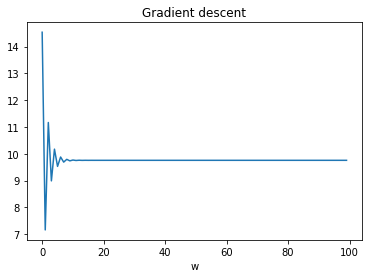

In [10]:
params = np.array(params)
plt.plot(params)
plt.title('Gradient descent')
plt.xlabel('w')
plt.show()

In [11]:
params[-1]

9.757142247178272

## Scikit Learn way:

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(x, y_obs)

LinearRegression(fit_intercept=False)

In [13]:
model.intercept_, model.coef_

(0.0, array([[9.75714225]]))